# Checkout Project

In [42]:
# Import package
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom
import numpy as np

In [43]:
checkout = pd.read_csv('/Checkout Project/checkout.csv')

In [44]:
checkout.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     9000 non-null   int64  
 1   user_id        9000 non-null   int64  
 2   checkout_page  9000 non-null   object 
 3   order_value    7605 non-null   float64
 4   purchased      9000 non-null   float64
 5   gender         9000 non-null   object 
 6   browser        9000 non-null   object 
 7   time_on_page   9000 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 562.6+ KB


In [45]:
# Count gender 
checkout['gender'].value_counts(normalize=True)

gender
F    0.507556
M    0.492444
Name: proportion, dtype: float64

In [46]:
# Count gender and group by checkoutpage
checkout.groupby('checkout_page')['gender'].value_counts(normalize=True)

checkout_page  gender
A              M         0.505000
               F         0.495000
B              F         0.507333
               M         0.492667
C              F         0.520333
               M         0.479667
Name: proportion, dtype: float64

In [47]:
# Metrics estimation
checkout.groupby('gender')['purchased'].mean()

gender
F    0.908056
M    0.780009
Name: purchased, dtype: float64

In [48]:
checkout[(checkout['browser']=='chrome')|(checkout['browser']=='safari')].groupby('gender')['order_value'].mean() 

gender
F    29.814161
M    30.383431
Name: order_value, dtype: float64

In [49]:
checkout.groupby('browser')[['order_value', 'purchased']].mean()


,order_value,purchased
browser,,
chrome,30.016625,0.839088
firefox,29.887491,0.851725
safari,30.119808,0.844337


In [50]:
# Sample statistics
# Calculate the number of users in groups A and B
user_groupA = checkout[checkout['checkout_page'] == 'A']['purchased'].count() 
user_groupB = checkout[checkout['checkout_page'] == 'B']['purchased'].count() 

print('Group A users:',user_groupA) 
print('Group B users:',user_groupB)

Group A users: 3000
Group B users: 3000


In [51]:
# Calculate the mean purchase rates of groups A and B
group_meanA = checkout[checkout['checkout_page'] == 'A']['purchased'].mean() 
group_meanB = checkout[checkout['checkout_page'] == 'B']['purchased'].mean() 

print(f'Group A mean purchase rate: {group_meanA:.3f}') 
print(f'Group B mean purchase rate: {group_meanB:.3f}')

Group A mean purchase rate: 0.820
Group B mean purchase rate: 0.847


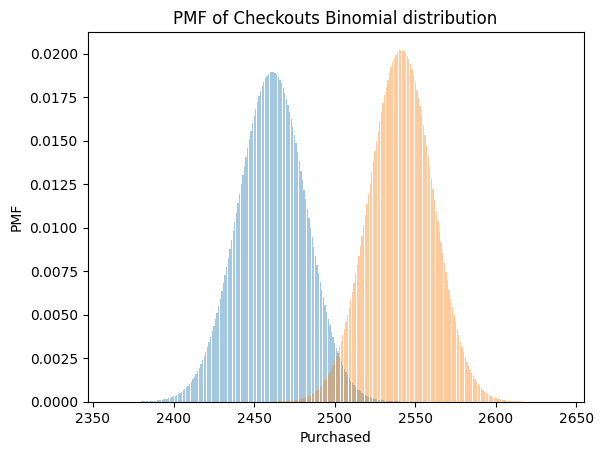

In [52]:
# Plotting distributions
# Create x-axis range and Binomial distributions A and B
x = np.arange(user_groupA*group_meanA - 100, user_groupB*group_meanB + 100)  
binom_a = binom.pmf(x, user_groupA, group_meanA) 
binom_b = binom.pmf(x, user_groupB, group_meanB)

# Plot Binomial distributions A and B 
plt.bar(x, binom_a, alpha=0.4, label='Checkout A') 
plt.bar(x, binom_b, alpha=0.4, label='Checkout B') 
plt.xlabel('Purchased') 
plt.ylabel('PMF') 
plt.title('PMF of Checkouts Binomial distribution') 
plt.show()

In [53]:
# Calculate the mean order value
checkout.order_value.mean()

np.float64(30.00969175937724)

In [54]:
# Replace missing values with zeros and get mean 
checkout['order_value'].fillna(0).mean()

np.float64(25.358189536673766)

In [55]:
# Check for duplicate rows due to logging issues
print(len(checkout))
print(len(checkout.drop_duplicates(keep='first')))

9000
9000


In [56]:
# Unique users in group B 
print(checkout[checkout['checkout_page'] == 'B']['user_id'].nunique())
# Unique users who purchased at least once 
print(checkout[checkout['checkout_page'] == 'B'].groupby('user_id')['purchased'].max().sum())
# Total purchase events in group B
print(checkout[checkout['checkout_page'] == 'B']['purchased'].sum())

2938
2491.0
2541.0


In [57]:
# Mean, count, and standard deviation summary
checkout.groupby('checkout_page')['order_value'].agg({'mean','std','count'})

,count,std,mean
checkout_page,,,
A,2461,2.418837,24.956437
B,2541,7.277644,29.876202
C,2603,4.869816,34.917589


Text(0, 0.5, 'Order Value [$]')

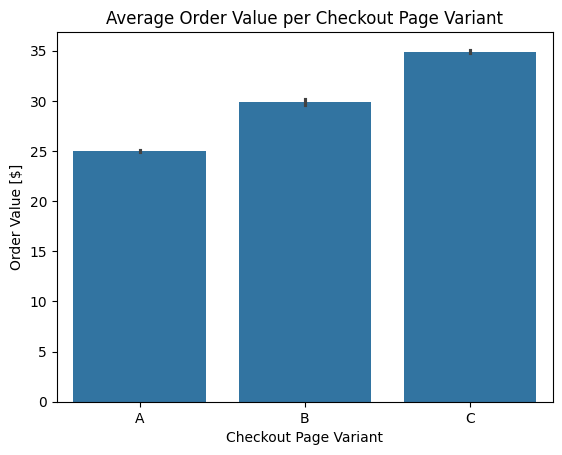

In [58]:
# Bar plots
sns.barplot(x=checkout['checkout_page'], y=checkout['order_value'], estimator=np.mean) 
plt.title('Average Order Value per Checkout Page Variant') 
plt.xlabel('Checkout Page Variant') 
plt.ylabel('Order Value [$]')

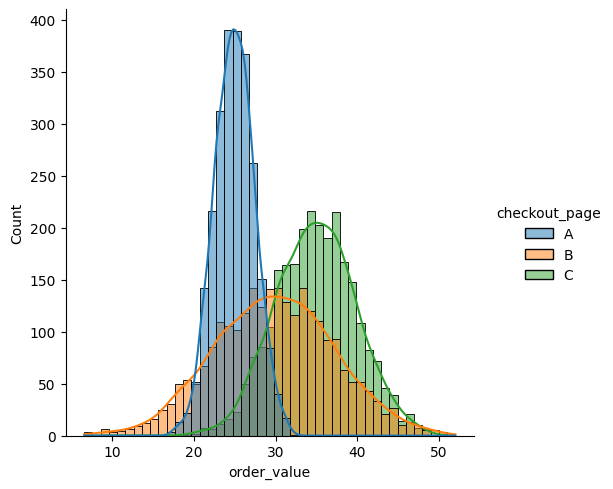

In [59]:
# Histograms
sns.displot(data=checkout, x='order_value', hue = 'checkout_page', kde=True) 

In [60]:
# Time on page
checkout.groupby('checkout_page')['time_on_page'].mean()

checkout_page
A    44.668527
B    42.723772
C    42.223772
Name: time_on_page, dtype: float64

In [61]:
# Calculate the mean and count of time on page by variant
print(checkout.groupby('checkout_page')['time_on_page'].agg({'mean', 'count'}))

               count       mean
checkout_page                  
A               3000  44.668527
B               3000  42.723772
C               3000  42.223772


In [62]:
# Checkout aggregation
print(checkout.groupby('checkout_page')[['order_value','purchased']].agg({'sum','count','mean'}))

              order_value                          purchased                  
                    count       mean           sum     count      mean     sum
checkout_page                                                                 
A                    2461  24.956437  61417.791564      3000  0.820333  2461.0
B                    2541  29.876202  75915.430125      3000  0.847000  2541.0
C                    2603  34.917589  90890.484142      3000  0.867667  2603.0


In [63]:
checkout.groupby('checkout_page')['order_value'].sum()/checkout.groupby('checkout_page')['purchased'].count() 

checkout_page
A    20.472597
B    25.305143
C    30.296828
dtype: float64